In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [4]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'raw_news_data','raw_analyst_ratings.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data = data[['date','headline','url','publisher','stock']]
data.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [6]:
data.tail()

,date,headline,url,publisher,stock
1407323,2011-08-29 00:00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX
1407324,2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX
1407325,2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX
1407326,2011-06-21 00:00:00,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX
1407327,2011-05-12 00:00:00,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,ZX


**Descriptive Statistics**

In [10]:
data['headline_length'] = data['headline'].apply(len)
# Descriptive statistics for headline length
headline_stats = data['headline_length'].describe()
article_count_by_publisher = data['publisher'].value_counts()
print(headline_stats)
print(article_count_by_publisher)
data.head()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


,date,headline,url,publisher,stock,headline_length
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


In [13]:
article_count_by_publisher.head(25)

publisher
Paul Quintaro           228373
Lisa Levin              186979
Benzinga Newsdesk       150484
Charles Gross            96732
Monica Gerson            82380
Eddie Staley             57254
Hal Lindon               49047
ETF Professor            28489
Juan Lopez               28438
Benzinga Staff           28114
Vick Meyer               24826
webmaster                20313
Benzinga_Newsdesk        19410
Zacks                    19390
Jayson Derrick           19050
Allie Wickman            18317
Shanthi Rexaline         16640
Craig Jones              16221
Wayne Duggan             12897
Nelson Hem               12590
Dwight Einhorn           12226
Michael J. Zerinskas     10892
Joe Young                10777
Javier Hasse              8839
David Johnson             8749
Name: count, dtype: int64

In [26]:
data.shape

(1407328, 7)

In [14]:
# Convert the column to datetime
data['date'] = pd.to_datetime(data['date'], format='ISO8601')
# Eract only the date
data['date'] = data['date'].dt.date
data.head()

,date,headline,url,publisher,stock,headline_length
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2,2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


<Figure size 700x500 with 0 Axes>

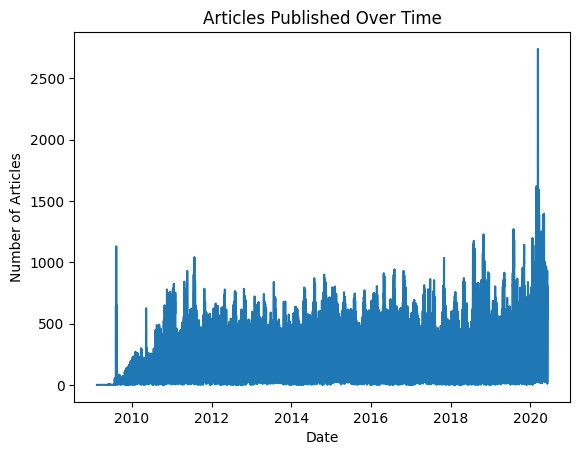

articles_per_month
date
2009-02        1
2009-04        3
2009-05       12
2009-06       40
2009-07       75
           ...  
2020-02    18879
2020-03    24994
2020-04    20757
2020-05    17992
2020-06     6447
Freq: M, Name: count, Length: 136, dtype: int64


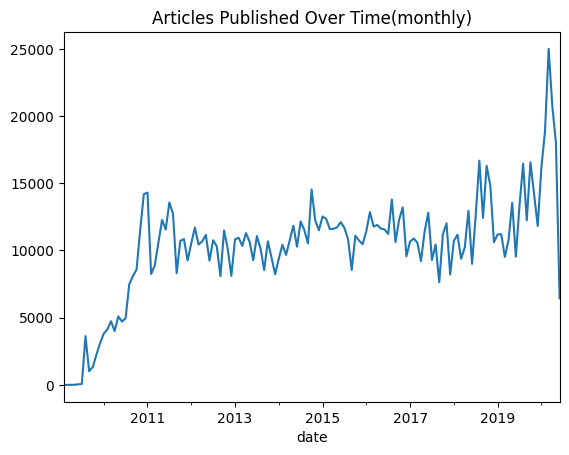

In [15]:
import matplotlib.pyplot as plt

# Plot Close price and MACD
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
# Count articles per day
articles_per_day = data['date'].value_counts().sort_index()
print(articles_per_day)

# Optional: Plotting the trend over time
articles_per_day.plot(kind='line', title='Articles Published Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()


# Convert the date column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

# Set the date as the index
data.set_index('date', inplace=True)

# Now convert the index to a period and count articles per month
articles_per_month = data.index.to_period('M').value_counts().sort_index()
print('articles_per_month')
print(articles_per_month)
# Optional: Plotting the trend over time
articles_per_month.plot(kind='line', title='Articles Published Over Time(monthly)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()

**Text Analysis(Sentiment analysis & Topic Modeling)**

In [16]:
from textblob import TextBlob

# Assuming your dataset is loaded into a DataFrame called 'data'
# Define a function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Determine the sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the headline column
data['sentiment'] = data['headline'].apply(get_sentiment)

# Display the result
print(data[['headline', 'sentiment']].head())

# Count the sentiment distribution
sentiment_distribution = data['sentiment'].value_counts()
print(sentiment_distribution)

# Analyze sentiment by publisher
sentiment_by_publisher = data.groupby('publisher')['sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_publisher)


                                                     headline sentiment
date                                                                   
2020-06-05            Stocks That Hit 52-Week Highs On Friday   Neutral
2020-06-03         Stocks That Hit 52-Week Highs On Wednesday   Neutral
2020-05-26                      71 Biggest Movers From Friday   Neutral
2020-05-22       46 Stocks Moving In Friday's Mid-Day Session   Neutral
2020-05-22  B of A Securities Maintains Neutral on Agilent...   Neutral
sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64
sentiment                   Negative  Neutral  Positive
publisher                                              
47ertrends                       0.0     18.0       0.0
AARP                             0.0      2.0       5.0
ABNNewswire                      8.0      5.0       0.0
Aakin                            0.0      1.0       4.0
Aaron Jackson.Ed                 1.0      0.0      15.0
...        

In [20]:
data.head()

,headline,url,publisher,stock,headline_length,sentiment
date,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,Neutral
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,Neutral
2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,Neutral
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,Neutral
2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,Neutral


In [19]:
sentiment_by_publisher.head()

sentiment,Negative,Neutral,Positive
publisher,,,
47ertrends,0.0,18.0,0.0
AARP,0.0,2.0,5.0
ABNNewswire,8.0,5.0,0.0
Aakin,0.0,1.0,4.0
Aaron Jackson.Ed,1.0,0.0,15.0


In [18]:
sentiment_distribution.head()

sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64

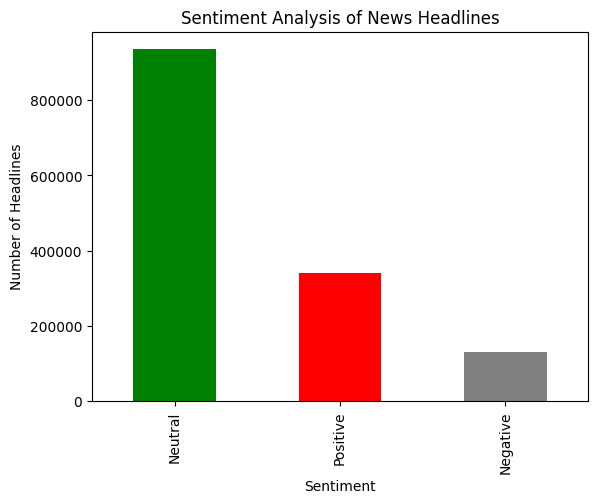

In [17]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of News Headlines')
plt.show()


In [23]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the headlines
data['cleaned_headline'] = data['headline'].apply(preprocess_text)

# Display the cleaned headlines
data['cleaned_headline'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AII\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AII\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


date
2020-06-05               stocks that hit 52week highs on friday
2020-06-03            stocks that hit 52week highs on wednesday
2020-05-26                        71 biggest movers from friday
2020-05-22           46 stocks moving in fridays midday session
2020-05-22    b of a securities maintains neutral on agilent...
Name: cleaned_headline, dtype: object

In [24]:
# Initialize CountVectorizer to extract keywords
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50)

# Fit and transform the cleaned headlines
X = vectorizer.fit_transform(data['cleaned_headline'])

# Get the feature names (keywords and phrases)
keywords = vectorizer.get_feature_names_out()

# Sum the occurrences of each keyword/phrase across all headlines
keyword_counts = X.toarray().sum(axis=0)

# Create a DataFrame for keyword frequency
keyword_frequency = pd.DataFrame({'keyword': keywords, 'count': keyword_counts})
keyword_frequency = keyword_frequency.sort_values(by='count', ascending=False)

# Display the most common keywords or phrases
print(keyword_frequency.head(10))


     keyword   count
49        vs  162061
43    stocks  161868
13       est  140578
12       eps  128910
41    shares  114182
35   reports  108705
47    update   91680
20    market   90879
9   earnings   87185
36     sales   79524


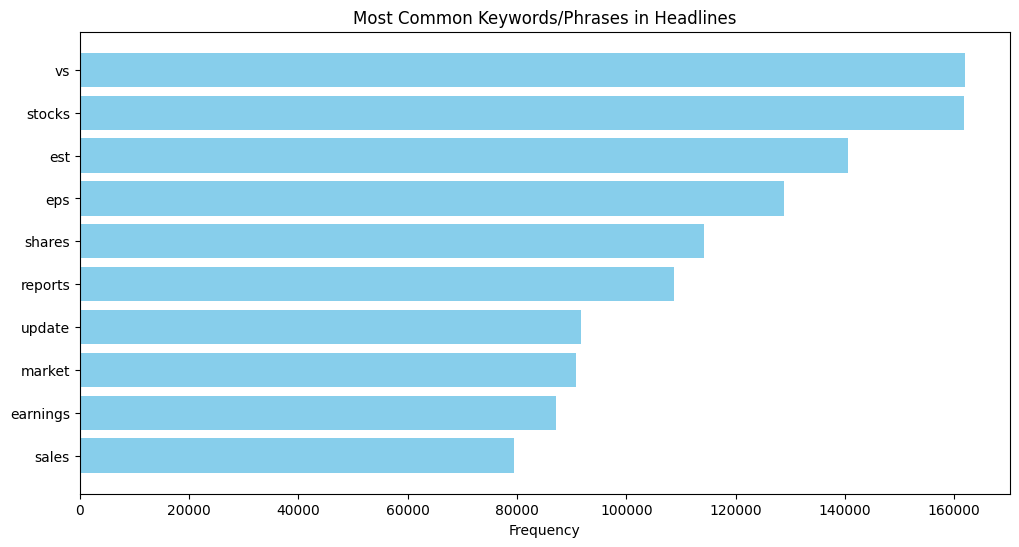

In [25]:
import matplotlib.pyplot as plt

# Plot the most common keywords
plt.figure(figsize=(12, 6))
plt.barh(keyword_frequency['keyword'].head(10), keyword_frequency['count'].head(10), color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Common Keywords/Phrases in Headlines')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


**method2**

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel

# Download NLTK stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Assuming your dataset is loaded into a DataFrame called 'data'
# Function to preprocess the headlines
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = [word for word in nltk.word_tokenize(text) if word.isalpha() and word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the headline column
data['cleaned_headline'] = data['headline'].apply(preprocess_text)


In [ ]:
from collections import Counter

# Extract n-grams
def get_ngrams(text, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit(text)
    ngrams = vectorizer.transform(text)
    sum_ngrams = ngrams.sum(axis=0)
    ngrams_freq = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq

# Get common bigrams
common_bigrams = get_ngrams(data['cleaned_headline'], n=2)

# Display the top 10 common bigrams
print(common_bigrams[:10])


In [ ]:
# Tokenize the cleaned headlines
data['tokens'] = data['cleaned_headline'].apply(lambda x: x.split())

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(text) for text in data['tokens']]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


**Time Series Analysis:**

In [ ]:

# Plot Close price and MACD
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
# Count articles per day
articles_per_day = data['date'].value_counts().sort_index()
print(articles_per_day)

# Optional: Plotting the trend over time
articles_per_day.plot(kind='line', title='Articles Published Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()


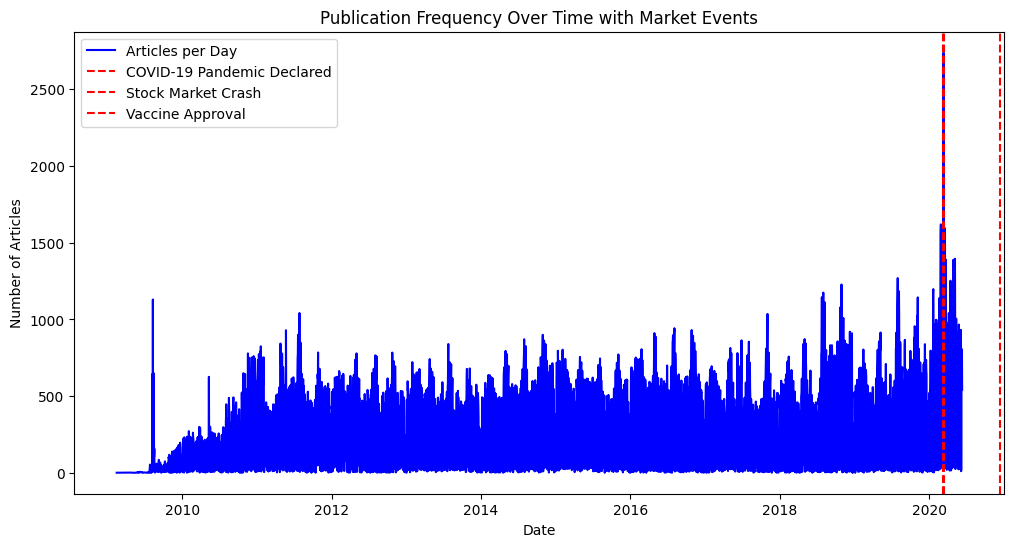

In [27]:
# Example: Known market events
market_events = {
    'COVID-19 Pandemic Declared': '2020-03-11',
    'Stock Market Crash': '2020-03-16',
    'Vaccine Approval': '2020-12-11'
}

# Convert the event dates to datetime
market_events = {event: pd.to_datetime(date) for event, date in market_events.items()}

# Plot the number of articles published each day with event markers
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day.index, articles_per_day.values, label='Articles per Day', color='blue')
for event, date in market_events.items():
    plt.axvline(x=date, color='red', linestyle='--', label=event)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Time with Market Events')
plt.legend()
plt.show()


In [51]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'raw_news_data','raw_analyst_ratings.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data = data[['date','headline','url','publisher','stock']]
data.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [52]:
# Convert the column to datetime

# Eract only the date
# data['date'] = data['date'].dt.date
# data.head()

In [56]:
# Assuming your dataset is loaded into a DataFrame called 'data'
# Ensure the date column is in datetime format
# data['date'] = pd.to_datetime(data['date'], format="mixed")
data['date'] = pd.to_datetime(data['date'], format='ISO8601')

# Extract the hour of publication
data['hour'] = data['date'].dt.hour

# Display the first few entries to verify
print(data[['date', 'hour']].head())


                       date  hour
0 2020-06-05 10:30:54-04:00    10
1 2020-06-03 10:45:20-04:00    10
2 2020-05-26 04:30:07-04:00     4
3 2020-05-22 12:45:06-04:00    12
4 2020-05-22 11:38:59-04:00    11


In [59]:
data.tail(20)

,date,headline,url,publisher,stock,hour
1407308,2013-12-23 00:00:00-04:00,China Zenix Special Committee to Evaluate Prop...,https://www.benzinga.com/news/13/12/4175762/ch...,Charles Gross,ZX,0
1407309,2013-12-09 00:00:00-04:00,China Zenix Auto Announces Special Committee o...,https://www.benzinga.com/news/13/12/4138839/ch...,Charles Gross,ZX,0
1407310,2013-11-29 00:00:00-04:00,Stocks Hitting 52-Week Lows,https://www.benzinga.com/news/13/11/4117449/st...,Monica Gerson,ZX,0
1407311,2013-11-25 00:00:00-04:00,China Zenix Auto Shares Halted on NYSE Just Fo...,https://www.benzinga.com/news/13/11/4106696/ch...,Paul Quintaro,ZX,0
1407312,2013-11-25 00:00:00-04:00,China Zenix Auto International Board Receives ...,https://www.benzinga.com/news/13/11/4106694/ch...,Charles Gross,ZX,0
1407313,2013-03-21 00:00:00-04:00,China Zenix Auto International Limited Reports...,https://www.benzinga.com/news/earnings/13/03/3...,Paul Quintaro,ZX,0
1407314,2013-03-21 00:00:00-04:00,"Earnings Scheduled For March 21, 2013",https://www.benzinga.com/news/earnings/13/03/3...,Monica Gerson,ZX,0
1407315,2013-01-10 00:00:00-04:00,"Top Narrow Based Indexes For January 10, 2013",https://www.benzinga.com/news/13/01/3232441/to...,Lisa Levin,ZX,0
1407316,2012-12-20 00:00:00-04:00,A Peek Into The Market Before The Trading Starts,https://www.benzinga.com/news/12/12/3189703/a-...,Lisa Levin,ZX,0
1407317,2012-12-20 00:00:00-04:00,Zenix Auto's Chairman Becomes Controlling Shar...,https://www.benzinga.com/news/12/12/3189454/ze...,Charles Gross,ZX,0


hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64


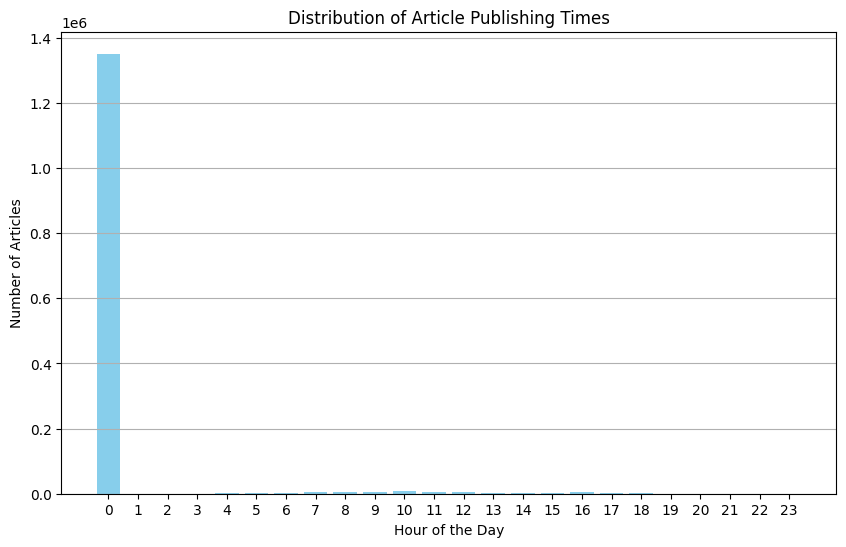

In [57]:
# Count the number of articles published at each hour
articles_per_hour = data['hour'].value_counts().sort_index()

# Display the distribution
print(articles_per_hour)

# Plot the number of articles published at each hour
plt.figure(figsize=(10, 6))
plt.bar(articles_per_hour.index, articles_per_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Publishing Times')
plt.xticks(range(24))  # Ensure all 24 hours are shown
plt.grid(axis='y')
plt.show()

**Publisher Analysis**

In [60]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called 'data'
# Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()

# Display the result
print(articles_per_publisher)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [61]:
# Keyword Analysis
from sklearn.feature_extraction.text import CountVectorizer

# Filter data by publisher and perform keyword analysis
publisher_keywords = {}
for publisher in data['publisher'].unique():
    publisher_data = data[data['publisher'] == publisher]['headline']
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50)
    X = vectorizer.fit_transform(publisher_data)
    keywords = vectorizer.get_feature_names_out()
    keyword_counts = X.toarray().sum(axis=0)
    publisher_keywords[publisher] = pd.DataFrame({'keyword': keywords, 'count': keyword_counts}).sort_values(by='count', ascending=False)

# Display the most common keywords for each publisher
for publisher, keywords_df in publisher_keywords.items():
    print(f"Keywords for {publisher}:")
    print(keywords_df.head(10))
    print("\n")


Keywords for Benzinga Insights:
           keyword  count
38          stocks   3119
14          market   2052
29      pre market   1560
35         session   1560
28             pre   1560
15  market session   1560
1          52 week   1559
0               52   1559
11          hit 52   1559
10             hit   1559


Keywords for Lisa Levin:
          keyword  count
36         stocks  68373
19         market  50876
23            mid  42690
30         moving  32324
38  stocks moving  32324
34        session  32324
7         biggest  29090
5        benzinga  28547
9             day  28211
24        mid day  28141


Keywords for Vick Meyer:
         keyword  count
36         price  21702
45        target  21692
37  price target  21650
22     maintains  15471
38        raises   9976
39  raises price   9970
20        lowers   8509
21  lowers price   8507
3            buy   5933
32       neutral   4641


Keywords for vishwanath@benzinga.com:
         keyword  count
43        target   1835
3

In [62]:
#  Sentiment Analysis
from textblob import TextBlob

# Define a function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to headlines
data['sentiment'] = data['headline'].apply(get_sentiment)

# Analyze sentiment distribution by publisher
sentiment_by_publisher = data.groupby('publisher')['sentiment'].value_counts().unstack().fillna(0)

# Display the sentiment distribution for each publisher
print(sentiment_by_publisher)


sentiment                   Negative  Neutral  Positive
publisher                                              
47ertrends                       0.0     18.0       0.0
AARP                             0.0      2.0       5.0
ABNNewswire                      8.0      5.0       0.0
Aakin                            0.0      1.0       4.0
Aaron Jackson.Ed                 1.0      0.0      15.0
...                              ...      ...       ...
vic@forextraininggroup.com       0.0      1.0       0.0
vishwanath@benzinga.com         13.0   1732.0      85.0
vivek.proactive@gmail.com        3.0    114.0       3.0
wallstreet1928                   1.0      6.0       1.0
webmaster                     1979.0  14776.0    3558.0

[1034 rows x 3 columns]


In [63]:
#  Topic Modeling (Advanced)
from sklearn.decomposition import LatentDirichletAllocation

# Prepare data for topic modeling
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(data['headline'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[-10:]]))
    print("\n")


Topic #0:
etfs companies trading benzinga shares new companies week market stocks trading


Topic #1:
company trading higher market update mid estimate says market update shares


Topic #2:
day initiates coverage downgrades biggest coverage initiates buy upgrades benzinga announces


Topic #3:
52 week sees week 52 stocks sales reports eps est vs


Topic #4:
lowers price target price target market stocks raises maintains earnings pt


